# Lecture 3.6: Logistic Regression

[**Lecture Slides**](https://docs.google.com/presentation/d/1gk8b6M08T_D8BNbOts2CYkD4qxOeQVWefx7pWTt-YjI/edit?usp=sharing)

This lecture, we are going to use logistic regression to predict the quality of wines.

**Learning goals:**

- solve a classification problem
- fit a logistic regression model
- predict using a logistic regression model
- visualize the decision boundary of a logistic regression model

## 1. Introduction

Humans have been making wine for more than [8000 years](https://www.nationalgeographic.com/travel/destinations/asia/georgia/sponsor-content-secret-birthplace-of-wine/),  and that's a lot of bottles. 🍷 There's too many options! Let's use data science to help choose the _tastiest_ red wines. Or at least, to classify high rated wines vs low rated wines based on some chemical features. 

## 2. Data Munging

Let's load the dataset into a `DataFrame`:

In [1]:
import pandas as pd

df = pd.read_csv('wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tasty
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tasty
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.866341e-16,-7.109871e-17,-1.244227e-16,3.910429e-16,-4.443669e-17,3.554936e-17,-3.469617e-14,2.843948e-15,6.754377e-16,5.332403e-17,0.534709
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.498950
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,0.000000
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,0.000000
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,1.000000
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,1.000000
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,1.000000


Each row of our dataset is a wine.

The `tasty` column indicates if a wine is "tasty" or not. i.e if it has a high rating. Even if it is represented by an integer, it is a _categorical_ column, as values are either 0 or 1. This will be the _label_ we are aiming to _predict_ in this _classification_ task.

The other columns are numerical features. Their means are close to 0, which suggests that this dataset was normalized, like for lecture 3.5.

To keep things simple and easy to visualize, let's start by using only two features to predict the "tastiness" of these wines: `sulphates` and `alcohol`.

In [3]:
X = df[['sulphates', 'alcohol']]
y = df['tasty']
X.shape

(1599, 2)

Since our features are already a _matrix_, we do not need to convert our `X` and `y` to numpy arrays and reshape them. Which means we're ready for training!

## 3. Training

We'll use sklearn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) model which, as always, will make things simple with the `.fit()` and `.predict()` methods.

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)

🧠 Can you recall all the optimization steps that sklearn takes care of in the `.fit()` method? Refer to lectures 3.4 & 3.5 if this isn't clear.

Just like for linear regression, we can investigate the _parameters_ of our model, $\theta$.
They won't be _interpreted_ in the same way however, since our hypothesis uses the logistic function. Nevertheless, sklearn still calls these parameters `intercept_` and `coef_`.

In [5]:
import numpy as np

theta = np.append(clf.intercept_, clf.coef_)
theta

array([0.24435503, 0.4510355 , 1.09938009])

This means that the optimization procedure found that the logistic hypothesis which best predits the `tasty` labels is:

$$\begin{align}
h_{\theta}(x_{1}, x_{2}) &= \frac{1}{1 + e^{-(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2})}} \\
h_{\theta}(x_{1}, x_{2}) &= \frac{1}{1 + e^{-(0.244 + 0.451 x_{1} + 1.099 x_{2})}}
\end{align}$$

where $x_{1}$ is our first feature, the `sulphates` column, and $x_{2}$ is our second feature, the `alcohol` column.

This is a function with two variables that we can plot in 3D:



<IPython.core.display.Javascript object>


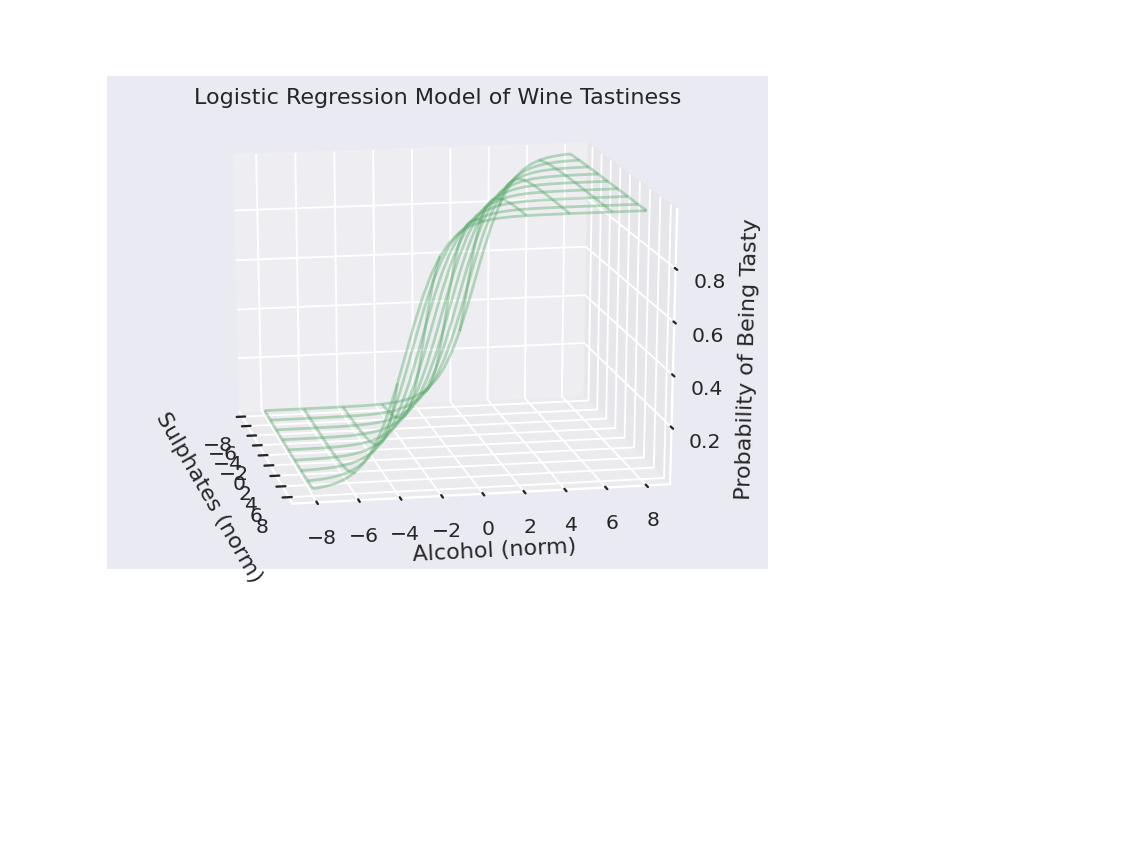

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import math

sns.set()

def hypothesis(x1, x2):
    linear_term = theta[0] + theta[1] * x1 + theta[2] * x2
    return 1 / (1 + math.exp(-linear_term))

v_hypothesis = np.vectorize(hypothesis)
    
def create_mesh(theta):
    x_values = np.linspace(-8, 8, 40)
    y_values = np.linspace(-8, 8, 40)
    x_mesh, y_mesh = np.meshgrid(x_values, y_values)
    z_mesh = v_hypothesis(x_mesh, y_mesh)
    return x_mesh, y_mesh, z_mesh
    
x_mesh, y_mesh, z_mesh = create_mesh(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x_mesh, y_mesh, z_mesh, rstride=5, cstride=5, alpha=0.4, color='g')

ax.set_title('Logistic Regression Model of Wine Tastiness')
ax.set_xlabel('Sulphates (norm)')
ax.set_ylabel('Alcohol (norm)')
ax.set_zlabel('Probability of Being Tasty');


🧠 Is this the shape you expected? Can you relate this to the 1D plots of the logistic function we saw in the slides?

We could add our data points to this 3D graph. However, things would get crowded, and _encoding_ a binary label on the z-axis of a 3D plot isn't very clear. We end up with some points near the "roof" of the volume, and others near the "floor", without a good way of comparing them.

Instead, we can use _color_ to encode the labels of the data points. We'll visualize the wines with the `tasty=1` label in red, and the non `tasty` wines in blue. In short, we are using a _2D graph_, where:
- on the x-axis, the `sulphates` feature
- on the y-axis, the `alcohol` feature
- as color, the `tasty` binary label

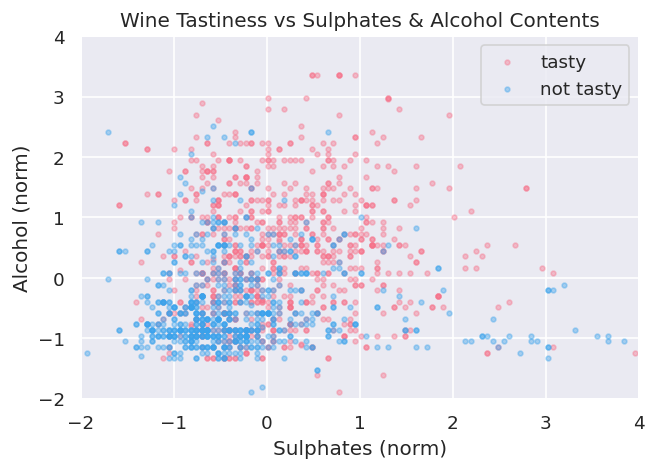

In [7]:
%matplotlib inline

colors = sns.color_palette('husl').as_hex()

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)

# plot points
positives = X[y == 1]
negatives = X[y == 0]
ax.scatter(positives.iloc[:, 0], positives.iloc[:, 1], alpha=0.4, s=8,c=colors[0], label='tasty')
ax.scatter(negatives.iloc[:, 0], negatives.iloc[:, 1], alpha=0.4, s=8, c=colors[4], label='not tasty')

# formatting
ax.set_ylim((-2, 4))
ax.set_xlim((-2, 4))
ax.set_xlabel('Sulphates (norm)')
ax.set_ylabel('Alcohol (norm)')
ax.legend()
ax.set_title('Wine Tastiness vs Sulphates & Alcohol Contents');




😨 This data is messy! This is a good example of what _real world data_ looks like. No clean clusters, no clean cut classes. How easy it is to split the dataset into its categorical labels is often called the _separability_ of the data. A dataset that is _separable_ has clear optimal decision boundaries that would lead to few prediction errors. In this case, it's not even clear to a human where to draw the line between `tasty` and not `tasty`!

Let's look at our logistic regression model's attempt at separating the labels... maybe it has tasted more bottles than us 😏. Here, the prediction probabilities we visualized in the 3D graph isn't really what we wish to see. We would like to compare the _binary predictions_ against the binary labels. 

For this, we have to show the _decision boundary_ of our model. But all we have are the model parameters, $\theta$ ! How do we go from the shape of the _hypothesis_ to the shape of the _decision boundary_ ? 🤨


## 4. Decision Boundary

Remember we defined how to go from prediction probability to binary prediction in the slides. We choose a threshold such that:  

if $h_{\theta}(\textbf{x}) >= 0.5$ :  
    _predict 1_  
else:   
    _predict 0_

The decision boundary is the set of points where predictions "switch" from 0 to 1. This means we can represent the it as all the points where:

$$
h_{\theta}(x_{1}, x_{2}) = 0.5 \label{eq:threshold} \tag{1}
$$

However, this doesn't help us much with plotting it in matplotlib... Ideally, we expect a line equation of the form:

$$
y = b + ax
$$

And since we're using a 2D plot where our feature `sulphates` ($x_{1}$) is on the x-axis, and our feature `alcohol` ($x_{2}$) is on the y-axis, we can rewrite the above as:

$$
x_{2} = b + ax_{1}
$$

So this is our goal. Now, let's use a bit of mathematical trickery to get there. 🧙‍♀️  
We can substitute the logistic hypothesis in equation $\eqref{eq:threshold}$:

$$
\begin{align}
\frac{1}{1 + e^{-(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2})}} &= 0.5 \label{eq:logistic} \tag{2} \\
\end{align}
$$

You might recall from the [plot](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg) of the logistic function that it is equal to $0.5$ when its input is $0$.  
So we can rewrite equation $\eqref{eq:logistic}$ as:

$$
\begin{align}
\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} &= 0 \\
\end{align}
$$

Finally, we can re-arrange the terms to get the line equation:

$$
\begin{align}
\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} &= 0 \\
x_{2} &= \frac{-(\theta_{0} + \theta_{1} x_{1})}{\theta_{2}} \\
x_{2} &= \frac{-\theta_{0}}{\theta_{2}} + \frac{ \theta_{1}}{\theta_{2}}x_{1} \\
\end{align}
$$


This is the equation of a _line_ with intercept $\frac{-\theta_{0}}{\theta_{2}}$ and slope $\frac{ \theta_{1}}{\theta_{2}}$. We can plot this in our 2D graph! 🎊 

We'll add our logistic regression model's decision boundary as a green line:


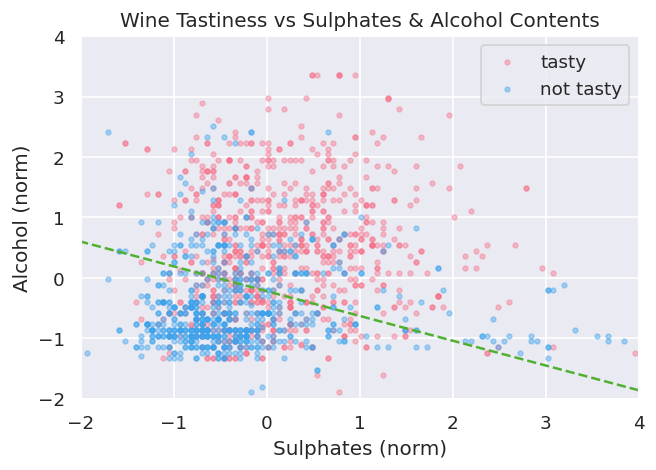

In [8]:
%matplotlib inline

colors = sns.color_palette('husl').as_hex()

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)

# plot points
positives = X[y == 1]
negatives = X[y == 0]
ax.scatter(positives.iloc[:, 0], positives.iloc[:, 1], alpha=0.4, s=8,c=colors[0], label='tasty')
ax.scatter(negatives.iloc[:, 0], negatives.iloc[:, 1], alpha=0.4, s=8, c=colors[4], label='not tasty')


def decision_boundary(x1, theta):
    return -(x1 * theta[1] + theta[0])/theta[2]

# plot decision boundary
x1 = np.array(ax.get_xlim())
x2 = decision_boundary(x1, theta)
ax.plot(x1, x2, '--', c=colors[2]);

# formatting
ax.set_ylim((-2, 4))
ax.set_xlim((-2, 4))
ax.set_xlabel('Sulphates (norm)')
ax.set_ylabel('Alcohol (norm)')
ax.legend()
ax.set_title('Wine Tastiness vs Sulphates & Alcohol Contents');




The green line is all the points where $h_{\theta}(x_{1}, x_{2}) = 0.5$. The points _above_ the line are the model's _positive_ predictions, i.e it thinks those wines are `tasty`, whilst the points _below_ the line are the model's _negative_ predictions, i.e it thinks those wines are not so `tasty`. Take you time to understand this graph, as it is typical of classification tasks. 

ℹ️ Notice that the predictions don't always match the true _label_ of the data. For example, take the blue point at $(-1.75, 2.4)$. The blue color shows that the label is 0, i.e a _not_ `tasty` wine. However, it is located _above_ the decision boundary, so the model think it is `tasty`. It's a classification error! Based on the _separability_ of the dataset, we can understand that the model makes a few mistakes... the goal of supervised learning algorithms isn't to perfectly predict a variable, but to find the model parameters that lead to the best _possible_ predictions.


🧠 Can you match this 2D graph with the 3D representation of the prediction probabilities of section 3? Where would the decision boundary be on the 3D graph?

## 5. Prediction

We are happy with our model, and want to try it out as soon as possible. During a visit to the supermarket, we find a strange looking wine bottle. It piques our curiosity, so we read the label: `sulphates=1.942` and `alcohol=-0.343` (in normalized units). Let's figure out if our model thinks this is a tasty bottle!

🧠 Can you graphically read the model prediction for this strange wine using the graph above?

We know by now that sklearn's `.predict()` method expects a matrix. Since we have only one example with two features, $x_{1}$ and $x_{2}$, it will be automatically instantiated as a 2D vector. Instead, let's reshape it to a ($1 \times 2$) `ndarray` matrix:

In [11]:
sulphates = 1.942
alcohol = -0.343
x_strange_wine = np.asarray([sulphates, alcohol]).reshape(1, 2)
# Or np.asarray([[sulphates, alcohol])

We can then predict the wine's tastiness using the logistic regression model that we trained earlier:

In [12]:
y_strange_wine = clf.predict(x_strange_wine)
y_strange_wine

array([1])

The prediction is positive, $1$, meaning our model thinks that this wine is `tasty`. Hopefully this means it doesn't taste as strange as it looks!

We can compare this bottle to the rest of our dataset, by plotting it on the 2D graph from section 4:

In [ ]:
%matplotlib inline

colors = sns.color_palette('husl').as_hex()

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)

# plot points
positives = X[y == 1]
negatives = X[y == 0]
ax.scatter(positives.iloc[:, 0], positives.iloc[:, 1], alpha=0.4, s=8,c=colors[0], label='tasty')
ax.scatter(negatives.iloc[:, 0], negatives.iloc[:, 1], alpha=0.4, s=8, c=colors[4], label='not tasty')


def decision_boundary(x1, theta):
    return -(x1 * theta[1] + theta[0])/theta[2]

# plot decision boundary
x1 = np.array(ax.get_xlim())
x2 = decision_boundary(x1, theta)
ax.plot(x1, x2, '--', c=colors[2]);

# plot strange wine
ax.plot(x_strange_wine[:, 0], x_strange_wine[:, 1], marker='x', markersize=20, markeredgewidth=4, color='r')

# formatting
ax.set_ylim((-2, 4))
ax.set_xlim((-2, 4))
ax.set_xlabel('Sulphates (norm)')
ax.set_ylabel('Alcohol (norm)')
ax.legend()
ax.set_title('Wine Tastiness vs Sulphates & Alcohol Contents');




We can indeed see that this strange looking wine is placed _above_ the decision boundary, which is why the `.predict()` method returned a value of $1$. 🙌

You might recall that we had many more features available in our dataset `df`. Going beyond two features means that we won't be able to plot the data or the decision boundary in a meaningful manner. However, the predictions are likely to be more accurate!

💪💪 Train a new logistic regression model named `full_clf` using _all_ the features available in our dataset `df`. Then predict the tastiness of the `mystery_wine` 🕵️‍♀️, and store it in a variable called `y_mystery`.  
Pro-tip: don't use the `tasty` column in your feature matrix X! That should be reserved as label vector, y.  
Pro-tip 2: please use the `random_state=0` argument when constructing your sklearn class, to make sure your results are reproducible. Else, the unit test won't pass!  
Pro-tip 3: If you also don't like typing out a big list of column names, you might want to consider [`.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [14]:
mystery_wine = np.array([-0.12, 0.82, 1.43, -0.29, 0.03, -0.90, -0.55, 2.19, -0.62, 0.43, 1.85]).reshape(1, -1)

# INSERT CODE

df_new = df.drop(columns=['tasty'])

X = df_new 

y = df['tasty']

full_clf = LogisticRegression(random_state=0).fit(X, y)

y_mystery = full_clf.predict(mystery_wine)


def test_mystery_wine_prediction():
    assert y_mystery == 1, 'The mystery wine is actually tasty! But your prediction says otherwise 😢'
    prob_mystery = full_clf.predict_proba(mystery_wine)[:, 1]
    assert math.isclose(prob_mystery, 0.7615, rel_tol=1e-3), f'Your prediction probability for the mystery wine is wrong'
    print('Success! 🎉')
    
test_mystery_wine_prediction()


Success! 🎉


In [15]:
# Just to check :
mystery_wine 

array([[-0.12,  0.82,  1.43, -0.29,  0.03, -0.9 , -0.55,  2.19, -0.62,
         0.43,  1.85]])

## 6. Summary

Today, we learned about our first classification method, **logistic regression**. We restated that classification tasks aim to predict **categorical** labels, and visualized this for one feature in a two dimensional plot. Linear models were a bad fit binary labels, so we discovered the **logistic function** that could predict **probabilities** between 0 & 1. We described how **thresholds** can turn these probabilities into a binary prediction. The logistic function can be **parameterized** by feeding a **linear model** as its argument, like a set of russian dolls. This means that we can **optimize** our logistic model using the **cross-entropy** cost function and **gradient descent**. We explained what **decision boundaries** are, and how important they are for **classifiers**. We also extended our logistic regression to the **multi-class** setting, where it could predict **multiple labels** with a **softmax** hypothesis. Finally, we put this knowledge to practice by predicting if wines were **tasty**, and visualizing the **decision boundary** of our trained **logistic regression** model.

# Resources
### Core Resources

- [**Slides**](https://docs.google.com/presentation/d/1gk8b6M08T_D8BNbOts2CYkD4qxOeQVWefx7pWTt-YjI/edit?usp=sharing)  
- [Coursera Machine Learning - Logistic Regression](https://www.coursera.org/lecture/machine-learning/classification-wlPeP)  
Andrew Ng's always excellent course goes into detail for this section on Logistic Regression.
- [Kaggle dataset - red wine quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)  
The dataset used in this notebook.


### Additional Resources

- [ML cheatsheet cost functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)  
A handy and mathematical summary of common cost functions, including MSE and cross-entropy.
- [Cross-entropy loss a visual explanation](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)  
A clear visual yet formal explanation of the cross-entropy cost function.
- [Binary vs multi-class logistic regression](https://chrisyeh96.github.io/2018/06/11/logistic-regression.html#multinomial-logistic-regression-via-cross-entropy)  
Comparison of logistic vs softmax functions for logistic regression models.
- [Understanding the softmax function in minutes](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)  
Comprehensive blogpost defining the softmax function and its uses in Machine Learning models.
